In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [44]:
df=pd.read_csv("movie_metadata.csv")

In [45]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [46]:
print("Dataset Shape:", df.shape)

Dataset Shape: (5043, 28)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   int32  
 1   director_name              5043 non-null   int32  
 2   num_critic_for_reviews     5043 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    5043 non-null   float64
 5   actor_3_facebook_likes     5043 non-null   float64
 6   actor_2_name               5043 non-null   int32  
 7   actor_1_facebook_likes     5043 non-null   float64
 8   gross                      5043 non-null   float64
 9   genres                     5043 non-null   int32  
 10  actor_1_name               5043 non-null   int32  
 11  movie_title                5043 non-null   int32  
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [47]:
print(df.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [48]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [49]:
df[col]

0        33000
1            0
2        85000
3       164000
4            0
         ...  
5038        84
5039     32000
5040        16
5041       660
5042       456
Name: movie_facebook_likes, Length: 5043, dtype: int64

In [50]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [51]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [52]:
le

LabelEncoder()

In [53]:
def classify_movie(score):
    if score < 3:
        return "Flop"
    elif 3 <= score < 6:
        return "Average"
    else:
        return "Hit"

In [54]:
df['Success_Class'] = df['imdb_score'].apply(classify_movie)

In [55]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success_Class
0,1,922,723.0,178.0,0.0,855.0,1405,1000.0,760505847.0,106,...,11,62,7,237000000.0,2009.0,936.0,7.9,1.78,33000,Hit
1,1,794,302.0,169.0,563.0,1000.0,2216,40000.0,309404152.0,100,...,11,62,7,300000000.0,2007.0,5000.0,7.1,2.35,0,Hit
2,1,2021,602.0,148.0,0.0,161.0,2487,11000.0,200074175.0,127,...,11,61,7,245000000.0,2015.0,393.0,6.8,2.35,85000,Hit
3,1,373,813.0,164.0,22000.0,23000.0,532,27000.0,448130642.0,287,...,11,62,7,250000000.0,2012.0,23000.0,8.5,2.35,164000,Hit
4,1,600,110.0,103.0,131.0,371.5,2431,131.0,25517500.0,753,...,11,62,9,20000000.0,2005.0,12.0,7.1,2.35,0,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,2047,1.0,87.0,2.0,318.0,671,637.0,25517500.0,605,...,11,10,9,20000000.0,2013.0,470.0,7.7,2.35,84,Hit
5039,1,2157,43.0,43.0,49.0,319.0,2904,841.0,25517500.0,735,...,11,62,10,20000000.0,2005.0,593.0,7.5,16.00,32000,Hit
5040,1,186,13.0,76.0,0.0,0.0,1972,0.0,25517500.0,823,...,11,62,9,1400.0,2013.0,0.0,6.3,2.35,16,Hit
5041,1,453,14.0,100.0,0.0,489.0,649,946.0,10443.0,638,...,11,62,7,20000000.0,2012.0,719.0,6.3,2.35,660,Hit


In [56]:
X = df.drop(['imdb_score', 'Success_Class'], axis=1)
y = df['Success_Class']

In [57]:
X

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,1,922,723.0,178.0,0.0,855.0,1405,1000.0,760505847.0,106,...,2964,3054.0,11,62,7,237000000.0,2009.0,936.0,1.78,33000
1,1,794,302.0,169.0,563.0,1000.0,2216,40000.0,309404152.0,100,...,2720,1238.0,11,62,7,300000000.0,2007.0,5000.0,2.35,0
2,1,2021,602.0,148.0,0.0,161.0,2487,11000.0,200074175.0,127,...,4532,994.0,11,61,7,245000000.0,2015.0,393.0,2.35,85000
3,1,373,813.0,164.0,22000.0,23000.0,532,27000.0,448130642.0,287,...,3755,2701.0,11,62,7,250000000.0,2012.0,23000.0,2.35,164000
4,1,600,110.0,103.0,131.0,371.5,2431,131.0,25517500.0,753,...,4917,156.0,11,62,9,20000000.0,2005.0,12.0,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,2047,1.0,87.0,2.0,318.0,671,637.0,25517500.0,605,...,4695,6.0,11,10,9,20000000.0,2013.0,470.0,2.35,84
5039,1,2157,43.0,43.0,49.0,319.0,2904,841.0,25517500.0,735,...,4370,359.0,11,62,10,20000000.0,2005.0,593.0,16.00,32000
5040,1,186,13.0,76.0,0.0,0.0,1972,0.0,25517500.0,823,...,4396,3.0,11,62,9,1400.0,2013.0,0.0,2.35,16
5041,1,453,14.0,100.0,0.0,489.0,649,946.0,10443.0,638,...,4368,9.0,11,62,7,20000000.0,2012.0,719.0,2.35,660


In [58]:
y

0       Hit
1       Hit
2       Hit
3       Hit
4       Hit
       ... 
5038    Hit
5039    Hit
5040    Hit
5041    Hit
5042    Hit
Name: Success_Class, Length: 5043, dtype: object

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Histogram of IMDB Scores

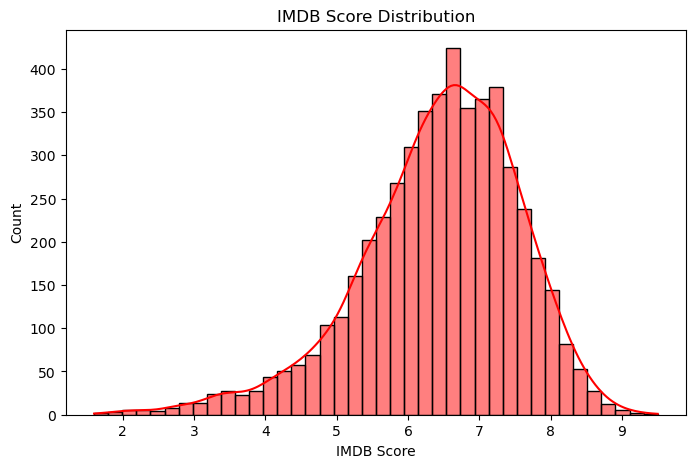

In [79]:
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_score'], bins=40, kde=True, color='red')
plt.title("IMDB Score Distribution")
plt.xlabel("IMDB Score")
plt.ylabel("Count")
plt.savefig("imdb_score_distribution.png")
plt.show()

## Correlation Heatmap (numeric columns only)

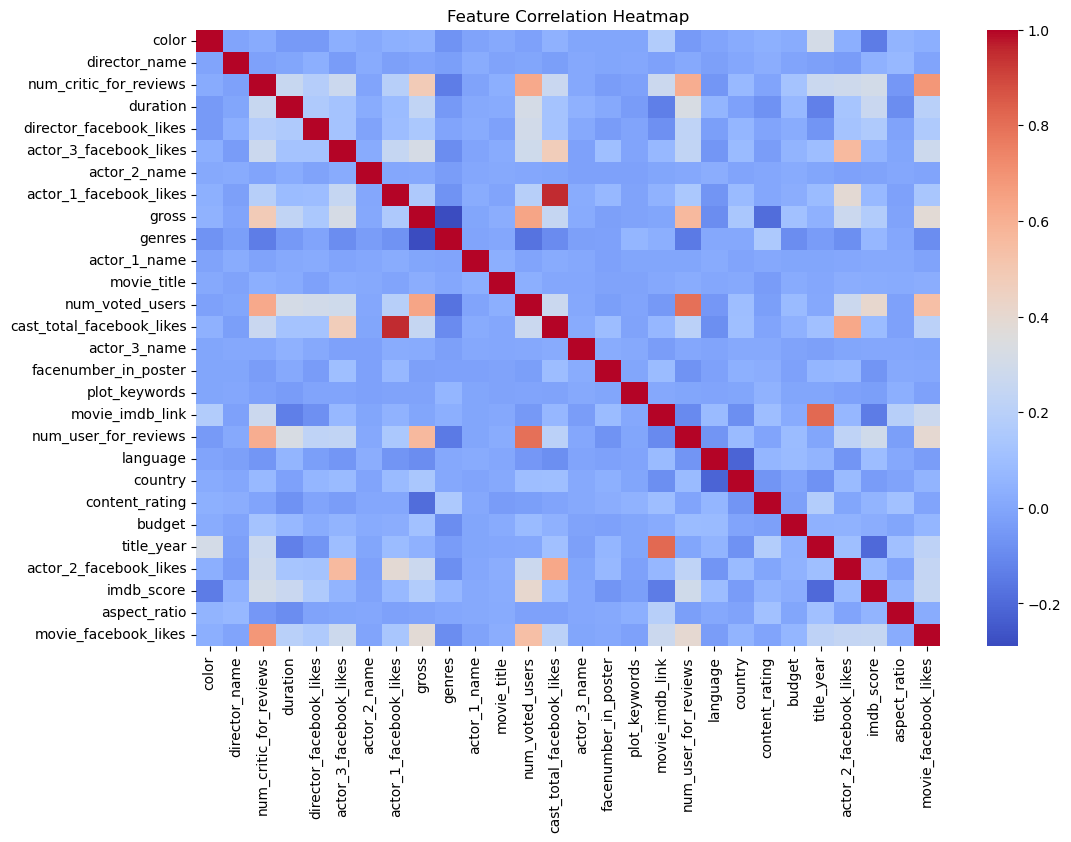

In [62]:

plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])  # only numeric columns
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

## Model Training & Evaluation

In [70]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

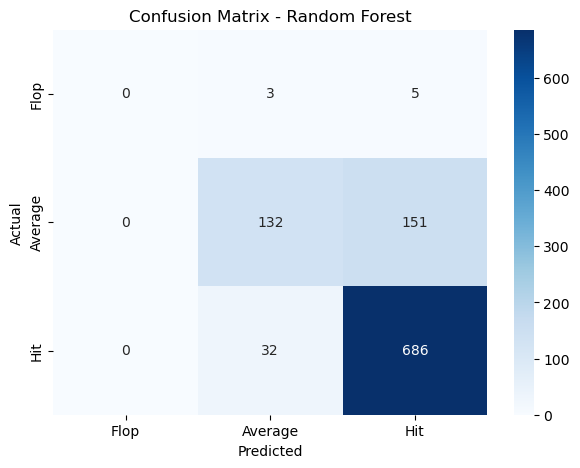

In [71]:
results = {}
for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    if name == "Random Forest":
        cm = confusion_matrix(y_test, y_pred, labels=["Flop", "Average", "Hit"])
        plt.figure(figsize=(7,5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Flop","Average","Hit"], yticklabels=["Flop","Average","Hit"])
        plt.title("Confusion Matrix - Random Forest")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.savefig("confusion_matrix.png")
        plt.show()

C:\Users\gokul\AppData\Local\Temp\ipykernel_14496\1212230502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


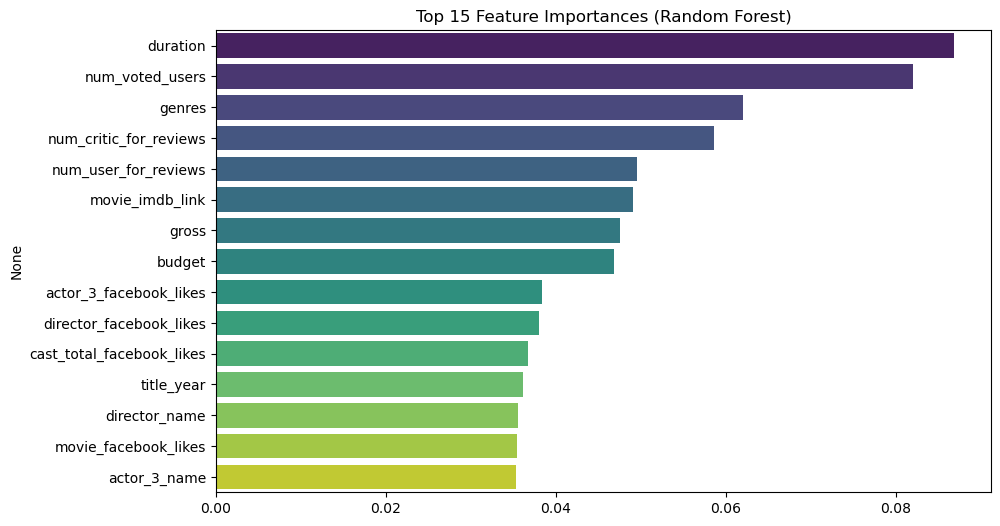

In [72]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.savefig("feature_importance.png")
plt.show()

## Model Accuracy Comparison

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.savefig("model_comparison.png")
plt.close()


C:\Users\gokul\AppData\Local\Temp\ipykernel_14496\1996712092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")


In [75]:

print("All charts saved as PNG files.")
print("Results:", results)

All charts saved as PNG files.
Results: {'Logistic Regression': 0.7244796828543112, 'Decision Tree': 0.7373637264618434, 'SVM': 0.7393458870168483, 'Random Forest': 0.8107036669970268}
